In [ ]:
!pip install numpy pandas matplotlib==3.7.3 seaborn librosa scikit-learn torch transformers


In [ ]:
!pip install tensorflow

In [3]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [4]:
import os

# Base path where the audio files are stored
base_path = './Downloads/LibriSpeech/dev-clean/'

# Lists to hold the features and labels (speaker IDs or gender)
features = []
labels = []

# to extract MFCC features from an audio file
def extract_features(file_path):
    audio, sr = librosa.load(file_path, sr=None)
    # Extract 16 MFCCs from the audio signal
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=16)
    return np.mean(mfccs.T, axis=0)

# Loop over each speaker directory
for speaker_id in os.listdir(base_path):
    speaker_path = os.path.join(base_path, speaker_id)
    
    if not os.path.isdir(speaker_path):
        continue
    
    # Loop over each chapter directory within the speaker directory
    for chapter_id in os.listdir(speaker_path):
        chapter_path = os.path.join(speaker_path, chapter_id)
        
        if not os.path.isdir(chapter_path):
            continue
        
        # Loop over each .flac file
        for audio_file in os.listdir(chapter_path):
            if audio_file.endswith('.flac'): # Process only .flac files
                file_path = os.path.join(chapter_path, audio_file)
                
                # Extract MFCC features
                mfcc_features = extract_features(file_path)
                features.append(mfcc_features)
                
                # Store the speaker ID as the label
                labels.append(speaker_id)

# Convert to DataFrame
df = pd.DataFrame(features)
df['speaker_id'] = labels

df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,speaker_id
0,-341.682129,63.929272,-40.748856,35.136776,-35.127068,-13.281225,-24.137272,0.502121,-3.608443,-6.894860,-2.822740,-8.377459,-2.088901,-9.628183,-2.167450,-4.892990,2412
1,-427.531311,39.702068,-20.348408,22.840950,-22.858767,-3.782265,-18.592751,0.163958,0.676260,-4.008523,-1.283186,-3.547989,-4.458155,-7.816164,-2.802448,-3.934327,2412
2,-369.549347,62.254398,-28.011257,36.332256,-29.117182,-8.202079,-22.153320,-9.687895,-2.779290,-7.835215,-2.874465,-6.305440,-3.036163,-7.613832,-1.881519,-4.866530,2412
3,-328.970642,74.167641,-47.932758,23.599272,-29.923786,-4.816751,-22.949512,-13.810078,-0.496978,-7.567257,-9.859808,-8.939904,-2.068019,-12.315131,-5.774308,-6.859083,2412
4,-340.118652,66.268257,-40.022591,45.824875,-30.038460,-7.871757,-24.567450,-6.339267,-3.930778,-8.068517,-1.258463,-7.198214,0.638180,-11.327822,-2.550204,-5.153607,2412


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2703 entries, 0 to 2702
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   0           2703 non-null   float32
 1   1           2703 non-null   float32
 2   2           2703 non-null   float32
 3   3           2703 non-null   float32
 4   4           2703 non-null   float32
 5   5           2703 non-null   float32
 6   6           2703 non-null   float32
 7   7           2703 non-null   float32
 8   8           2703 non-null   float32
 9   9           2703 non-null   float32
 10  10          2703 non-null   float32
 11  11          2703 non-null   float32
 12  12          2703 non-null   float32
 13  13          2703 non-null   float32
 14  14          2703 non-null   float32
 15  15          2703 non-null   float32
 16  speaker_id  2703 non-null   object 
dtypes: float32(16), object(1)
memory usage: 190.2+ KB


The dataset consists of 2,703 entries, and 17 columns with no null values

In [6]:
unique_speaker_ids = df['speaker_id'].unique()
print(unique_speaker_ids)

['2412' '2078' '3752' '1988' '1919' '422' '3000' '1993' '6313' '251'
 '8842' '5536' '7850' '174' '6295' '7976' '2803' '777' '5694' '1462'
 '5895' '2086' '6241' '2277' '2428' '3536' '2902' '8297' '3081' '6345'
 '652' '3853' '5338' '6319' '3170' '1272' '84' '3576' '1673' '2035']


In total, 40 unique speaker IDs are present in this dataset.

In [7]:
# Dictionary to store speaker information from the SPEAKERS.txt file
speaker_info = {}

# Read the SPEAKERS.txt file to map speaker ID to gender
with open('./Downloads/LibriSpeech/SPEAKERS.txt', 'r') as file:
    for line in file:
        if line.startswith(';'):  # Ignore comments in the file
            continue
        parts = line.strip().split('|')  # Split the line by '|'
        speaker_id = parts[0].strip()  # Extract the speaker ID
        gender = parts[1].strip()  # Extract the gender
        speaker_info[speaker_id] = gender


In [8]:
# Map the gender information to the dataframe using the speaker_id
df['gender'] = df['speaker_id'].map(speaker_info)

# Convert gender to numeric form: Female = 1, Male = 0
df['gender_numeric'] = df['gender'].apply(lambda x: 1 if x == 'F' else 0)


In [9]:
df.head(100)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,speaker_id,gender,gender_numeric
0,-341.682129,63.929272,-40.748856,35.136776,-35.127068,-13.281225,-24.137272,0.502121,-3.608443,-6.894860,-2.822740,-8.377459,-2.088901,-9.628183,-2.167450,-4.892990,2412,F,1
1,-427.531311,39.702068,-20.348408,22.840950,-22.858767,-3.782265,-18.592751,0.163958,0.676260,-4.008523,-1.283186,-3.547989,-4.458155,-7.816164,-2.802448,-3.934327,2412,F,1
2,-369.549347,62.254398,-28.011257,36.332256,-29.117182,-8.202079,-22.153320,-9.687895,-2.779290,-7.835215,-2.874465,-6.305440,-3.036163,-7.613832,-1.881519,-4.866530,2412,F,1
3,-328.970642,74.167641,-47.932758,23.599272,-29.923786,-4.816751,-22.949512,-13.810078,-0.496978,-7.567257,-9.859808,-8.939904,-2.068019,-12.315131,-5.774308,-6.859083,2412,F,1
4,-340.118652,66.268257,-40.022591,45.824875,-30.038460,-7.871757,-24.567450,-6.339267,-3.930778,-8.068517,-1.258463,-7.198214,0.638180,-11.327822,-2.550204,-5.153607,2412,F,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-271.068298,89.716675,12.686437,45.737129,8.364235,-1.676046,-3.458455,-20.905085,8.487628,-7.645513,-6.396749,6.074276,2.773393,5.057474,-4.009227,-1.523446,2078,M,0
96,-264.564056,89.657242,9.509440,37.921543,8.492599,-0.728869,-2.570848,-23.289165,4.458875,-5.634178,-9.145844,3.575878,3.193922,1.269930,-5.411459,-3.189599,2078,M,0
97,-294.358368,64.102371,12.968223,48.677349,9.992127,0.476691,-7.217000,-17.542009,7.520399,-7.435087,-6.168643,4.916871,4.602918,0.164118,-4.738193,0.816319,2078,M,0
98,-322.025574,66.190498,15.323215,43.356773,8.710369,2.052816,-0.761105,-12.749033,9.422757,-2.087115,-2.067623,2.138822,3.437515,4.886467,-2.506317,-0.460086,2078,M,0


In [10]:
speaker_id_count = df['speaker_id'].nunique()
print(f"Number of unique speaker IDs: {speaker_id_count}")
df_gender = df.drop(columns=['gender','speaker_id'])

Number of unique speaker IDs: 40


In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features = df_gender.iloc[:, :-2]  # Select only the feature columns (excluding gender_numeric)
scaled_features = scaler.fit_transform(features)  # Scale the features

# Create a new DataFrame with scaled features
df_scaled = pd.DataFrame(scaled_features, columns=df_gender.columns[:-2])

# Add the gender_numeric column back to the scaled DataFrame
df_scaled['gender_numeric'] = df_gender['gender_numeric']

df_scaled.head()  # Show the first few rows of the scaled dataframe

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,gender_numeric
0,0.475951,0.314678,0.349895,0.699838,0.258508,0.385720,0.311750,0.696335,0.471753,0.476304,0.569587,0.204186,0.516227,0.308277,0.562799,1
1,0.274458,0.147876,0.491048,0.553369,0.401295,0.495478,0.398559,0.690508,0.588636,0.556995,0.609119,0.371780,0.445575,0.351032,0.540209,1
2,0.410545,0.303147,0.438028,0.714079,0.328455,0.444408,0.342812,0.520749,0.494372,0.450016,0.568258,0.276090,0.487980,0.355806,0.572971,1
3,0.505786,0.385168,0.300189,0.562402,0.319068,0.483525,0.330346,0.449719,0.556631,0.457507,0.388892,0.184668,0.516850,0.244878,0.434484,1
4,0.479621,0.330782,0.354920,0.827156,0.317733,0.448225,0.305015,0.578450,0.462961,0.443494,0.609753,0.245109,0.597549,0.268174,0.549183,1


The MinMaxScaler is applied to the selected feature columns via the fit_transform() method, which scales the features between 0 and 1

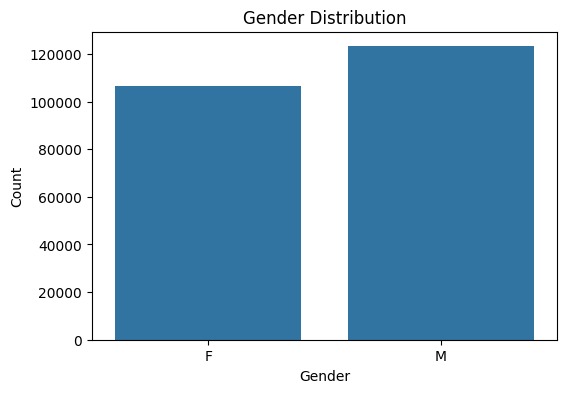

In [12]:
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

This visualization provides a clear view of the gender balance in the dataset. 
Although the two categories have a relatively imbalanced distribution, males have a slightly higher representation.

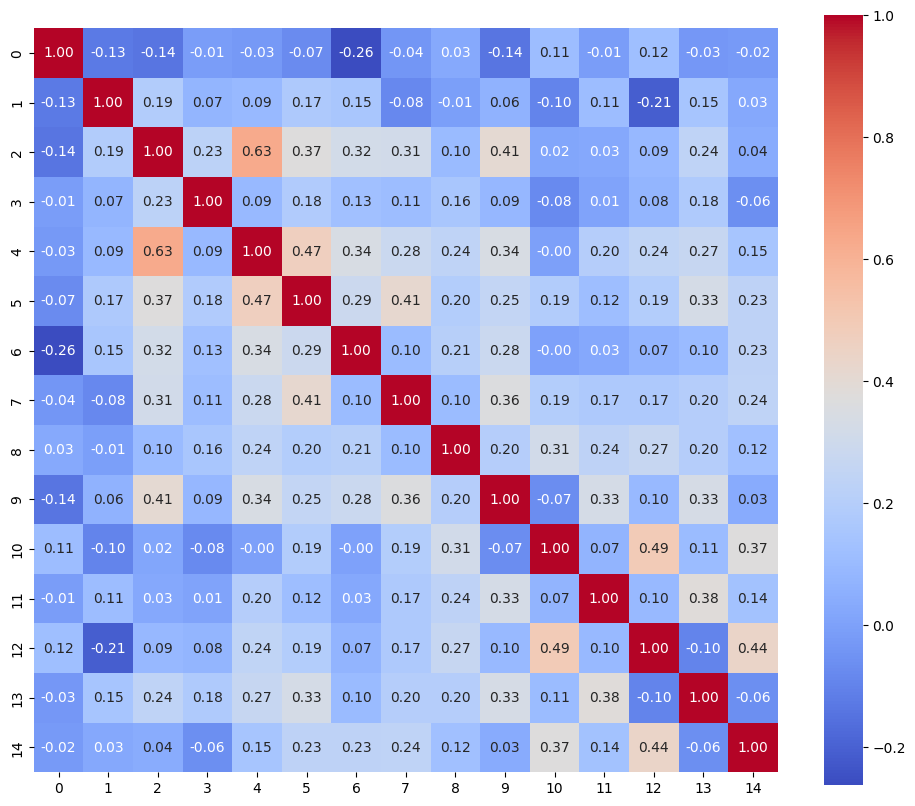

In [13]:
# Plot the heatmap with all values annotated
corr_matrix = df_scaled.drop(columns=['gender_numeric']).corr()

plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Show the plot
plt.show()

<span style="font-size: 16px;">The heatmap provides a visual summary of how the features in the dataset relate to one another. By identifying pairs of highly correlated features:</span>

1. Some strong correlations are observed between certain features, such as between feature 5 and feature 7 (0.49), 
and between feature 4 and feature 5 (0.63). These correlations suggest a relationship between these feature pairs that might be important in further analysis or model building.

2. Negative correlations, such as between feature 6 and feature 0 (-0.26), indicate inverse relationships where an increase in one feature corresponds to a decrease in the other.

3. Many features have weak or no correlation, with values close to zero, implying they are largely independent of each other.

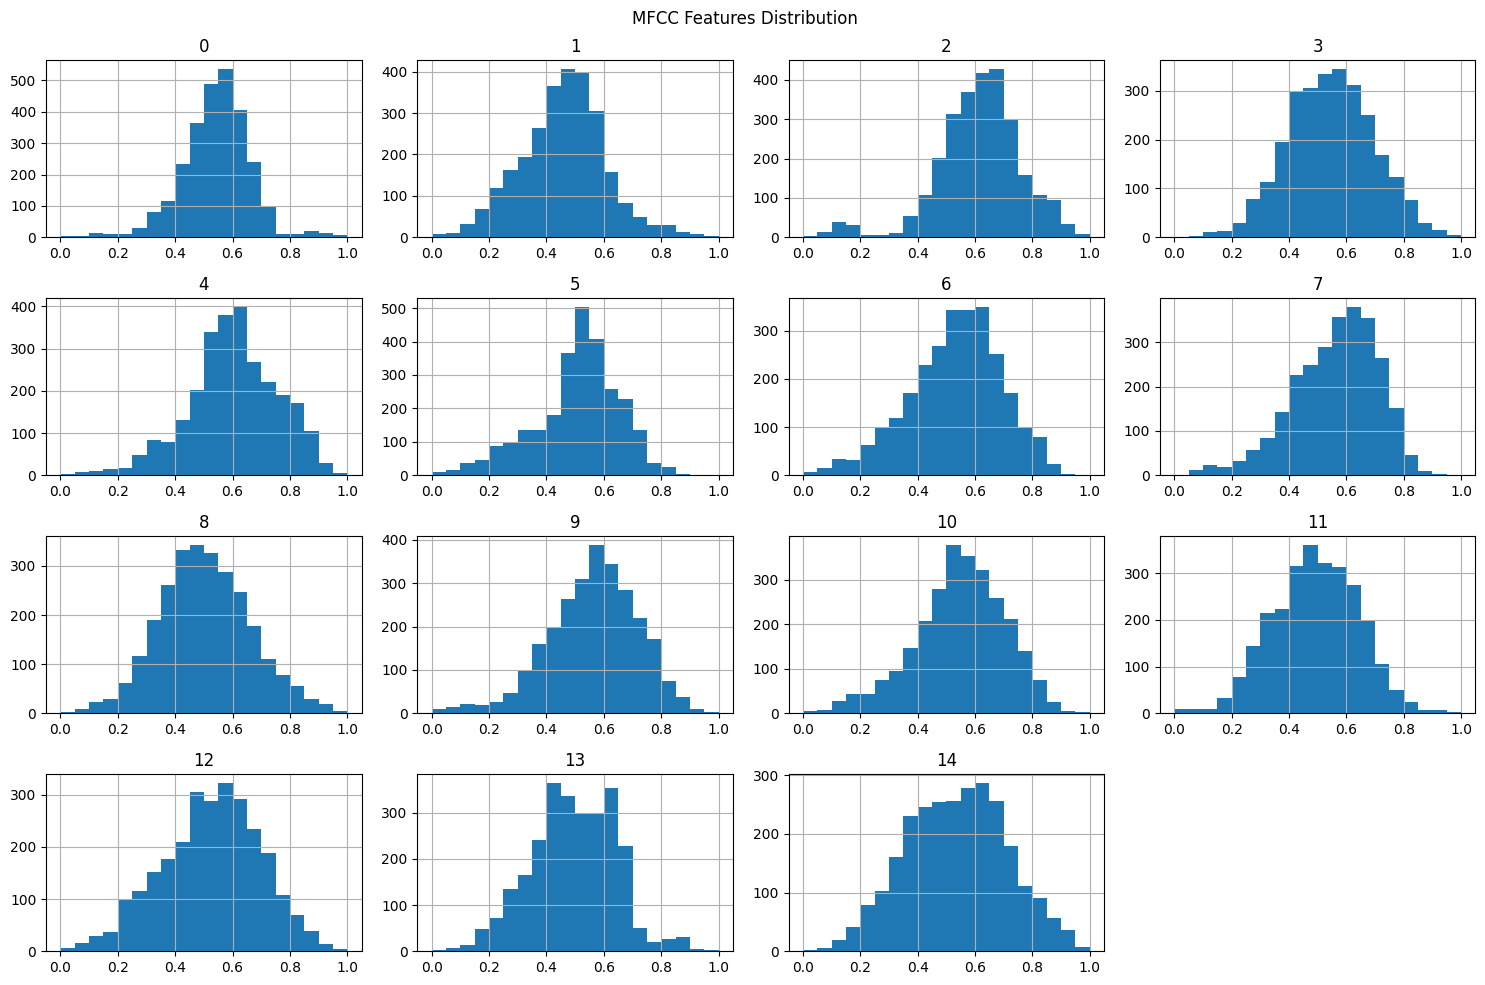

In [14]:
x = df_scaled.drop(columns=[ 'gender_numeric'])
x.hist(figsize=(15, 10), bins=20)
plt.suptitle('MFCC Features Distribution')
plt.tight_layout()
plt.show()

These features have relatively normal distributions, bell-shaped and, centered around 0.5 after scaling. This balanced distribution is beneficial for machine learning models, as it prevents certain features from dominating the learning process due to larger ranges or skewness. These histograms provide a quick overview of the feature scaling and allow for checking potential outliers or patterns in the feature set.

In [15]:
from sklearn.decomposition import PCA
X = df_scaled.drop(columns=['gender_numeric'])
y = df_scaled['gender_numeric']

# Perform the train-test split before PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
#Apply PCA only on the training data
pca = PCA(n_components=2)
pca_train_result = pca.fit_transform(X_train)

#Transform the test data using the same PCA model
pca_test_result = pca.transform(X_test)

# Create DataFrames to store PCA results for both train and test sets
df_train_pca = pd.DataFrame(pca_train_result, columns=['PCA1', 'PCA2'])
df_train_pca['gender_numeric'] = y_train.values

df_test_pca = pd.DataFrame(pca_test_result, columns=['PCA1', 'PCA2'])
df_test_pca['gender_numeric'] = y_test.values

Fitting on the training data: PCA is always fit on the training data to avoid data leakage, meaning that information from the test set does not influence the PCA transformation.
Applying the same transformation to the test data: After fitting the PCA on the training data, the same transformation (projection) is applied to the test data to ensure consistency.

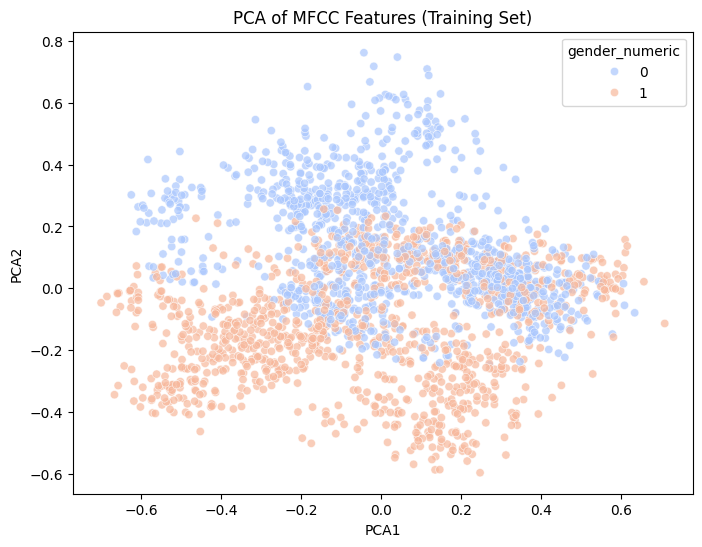

In [17]:
# PCA scatter plot for the training set
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='gender_numeric', data=df_train_pca, palette='coolwarm', alpha=0.7)
plt.title('PCA of MFCC Features (Training Set)')
plt.show()

The PCA model reduced the dataset to two principal components, which explain the largest variance within the data.

This figure provides some insight into the distribution of the MFCC features across the two gender categories, but the significant overlap in the clusters suggests that these first two components alone are insufficient for clear separation. This highlights the limitations of PCA in this context, particularly for categorical separation, and suggests that additional components or feature engineering may be necessary to achieve better classification.

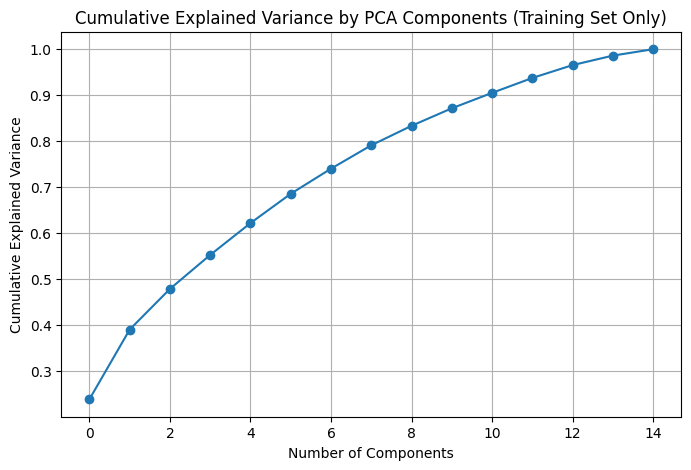

In [18]:
#Plot the cumulative explained variance on the training set
pca_full = PCA().fit(X_train)

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance by PCA Components (Training Set Only)')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


The first 2-3 components capture around 50% of the total variance in the dataset. This indicates that a substantial amount of the dataset’s structure can be represented in just a few dimensions.

After 10 components, the cumulative explained variance approaches 90%, and further components contribute less significantly to the overall variance so adding more components results in only marginal improvements in the variance captured.

10 components would retain a large portion of the variance (approximately 90%), reducing dimensionality while preserving most of the dataset’s information. Using all 15 components would capture close to 100% of the variance, but this may not be necessary if the goal is to reduce dimensionality.

In [19]:
## Reduce to 10 PCA components on the training set
pca_reduced = PCA(n_components=10)
reduced_train_features = pca_reduced.fit_transform(X_train)

# Apply the same transformation to the test set
reduced_test_features = pca_reduced.transform(X_test)

In [20]:
#Create DataFrames for reduced features
df_train_reduced = pd.DataFrame(reduced_train_features, columns=[f'PC{i+1}' for i in range(10)])
df_train_reduced['gender_numeric'] = y_train.values

df_test_reduced = pd.DataFrame(reduced_test_features, columns=[f'PC{i+1}' for i in range(10)])
df_test_reduced['gender_numeric'] = y_test.values

In [21]:
# Separate the features and target for training and testing
X_train_pca = df_train_reduced.drop(columns=['gender_numeric'])
y_train_pca = df_train_reduced['gender_numeric']

X_test_pca = df_test_reduced.drop(columns=['gender_numeric'])
y_test_pca = df_test_reduced['gender_numeric']

print(f"Training set size: {X_train_pca.shape[0]}")
print(f"Test set size: {X_test_pca.shape[0]}")


Training set size: 2162
Test set size: 541


In [22]:
train_distribution = y_train_pca.value_counts(normalize=True)
test_distribution = y_test_pca.value_counts(normalize=True)

print(f"Training set gender distribution:\n{train_distribution}")
print(f"Test set gender distribution:\n{test_distribution}")

Training set gender distribution:
gender_numeric
1    0.506475
0    0.493525
Name: proportion, dtype: float64
Test set gender distribution:
gender_numeric
1    0.515712
0    0.484288
Name: proportion, dtype: float64


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train_pca, y_train_pca)

# Predict on the test set
y_pred_log = log_reg.predict(X_test_pca)

# Evaluate the model
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test_pca, y_pred_log)}")
print(classification_report(y_test_pca, y_pred_log))


Logistic Regression Performance:
Accuracy: 0.8354898336414048
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       262
           1       0.84      0.85      0.84       279

    accuracy                           0.84       541
   macro avg       0.84      0.84      0.84       541
weighted avg       0.84      0.84      0.84       541



The logistic regression model achieves an accuracy of 83.5%, which indicates a good general performance on the test data.
The classification report shows that both classes are classified with similar performance, with precision, recall, and F1-scores all in the 0.83-0.85 range

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train_pca, y_train_pca)

# Predict on the test set
y_pred_rf = rf.predict(X_test_pca)

# Evaluate the model
print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test_pca, y_pred_rf)}")
print(classification_report(y_test_pca, y_pred_rf))


Random Forest Performance:
Accuracy: 0.944547134935305
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       262
           1       0.93      0.96      0.95       279

    accuracy                           0.94       541
   macro avg       0.95      0.94      0.94       541
weighted avg       0.94      0.94      0.94       541



The Random Forest Classifier achieved an accuracy of 94.45%, which is an excellent result.
Both classes (0 and 1) are predicted with high precision and recall, with F1-scores of 0.94 for class 0 and 0.95 for class 1, indicating that the model is robust across different categories.


In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train_pca.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_pca, y_train_pca, epochs=15, batch_size=32, validation_split=0.1)

# Evaluate on the test set
scores = model.evaluate(X_test_pca, y_test_pca)
print(f"Neural Network Accuracy: {scores[1]}")


Epoch 1/15
61/61 [==============================] - 0s 960us/step - loss: 0.6366 - accuracy: 0.7321 - val_loss: 0.5653 - val_accuracy: 0.7604
Epoch 2/15
61/61 [==============================] - 0s 428us/step - loss: 0.4431 - accuracy: 0.8386 - val_loss: 0.3915 - val_accuracy: 0.8203
Epoch 3/15
61/61 [==============================] - 0s 393us/step - loss: 0.3069 - accuracy: 0.8771 - val_loss: 0.3284 - val_accuracy: 0.8571
Epoch 4/15
61/61 [==============================] - 0s 406us/step - loss: 0.2565 - accuracy: 0.9054 - val_loss: 0.2953 - val_accuracy: 0.8802
Epoch 5/15
61/61 [==============================] - 0s 396us/step - loss: 0.2285 - accuracy: 0.9177 - val_loss: 0.2709 - val_accuracy: 0.8894
Epoch 6/15
61/61 [==============================] - 0s 401us/step - loss: 0.2024 - accuracy: 0.9280 - val_loss: 0.2513 - val_accuracy: 0.8986
Epoch 7/15
61/61 [==============================] - 0s 403us/step - loss: 0.1826 - accuracy: 0.9326 - val_loss: 0.2326 - val_accuracy: 0.9032
Epoch 

The network consists of 3 layers:
1. Input Layer: The first Dense layer has 64 neurons and uses the ReLU (Rectified Linear Unit) activation function. The input_dim=X_train_pca.shape[1] defines the number of input features (i.e., the number of principal components).
2. Hidden Layer: The second Dense layer has 32 neurons and also uses the ReLU activation function.
3. Output Layer: The output layer has 1 neuron and uses the sigmoid activation function, which is typical for binary classification tasks, outputting probabilities between 0 and 1.

with its three-layer structure, achieves excellent results on this classification task, with an accuracy of 94.45%. This result is comparable to the Random Forest model, demonstrating that both are effective approaches for the problem at hand. The consistent performance on both training and test sets suggests the model generalizes well without significant overfitting.

In [26]:
from tensorflow.keras.layers import Conv1D, Flatten, MaxPooling1D

# Reshape the input data for Conv1D
X_train_cnn = np.expand_dims(X_train_pca, axis=2)
X_test_cnn = np.expand_dims(X_test_pca, axis=2)

# Define the CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_model.fit(X_train_cnn, y_train_pca, epochs=15, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
cnn_scores = cnn_model.evaluate(X_test_cnn, y_test_pca)
print(f"CNN Accuracy: {cnn_scores[1]}")


Epoch 1/15
61/61 [==============================] - 0s 2ms/step - loss: 0.6338 - accuracy: 0.7404 - val_loss: 0.5689 - val_accuracy: 0.7558
Epoch 2/15
61/61 [==============================] - 0s 827us/step - loss: 0.4756 - accuracy: 0.7979 - val_loss: 0.4525 - val_accuracy: 0.7742
Epoch 3/15
61/61 [==============================] - 0s 733us/step - loss: 0.3915 - accuracy: 0.8262 - val_loss: 0.4035 - val_accuracy: 0.8111
Epoch 4/15
61/61 [==============================] - 0s 800us/step - loss: 0.3423 - accuracy: 0.8524 - val_loss: 0.3811 - val_accuracy: 0.8249
Epoch 5/15
61/61 [==============================] - 0s 803us/step - loss: 0.3127 - accuracy: 0.8730 - val_loss: 0.3538 - val_accuracy: 0.8341
Epoch 6/15
61/61 [==============================] - 0s 893us/step - loss: 0.2930 - accuracy: 0.8746 - val_loss: 0.3479 - val_accuracy: 0.8341
Epoch 7/15
61/61 [==============================] - 0s 877us/step - loss: 0.2760 - accuracy: 0.8843 - val_loss: 0.3354 - val_accuracy: 0.8387
Epoch 8/

The model is created using Sequential layers:
1. Conv1D Layer: The first layer is a 1D convolutional layer with 64 filters, a kernel size of 3, and ReLU activation. The input_shape is set to match the number of input features (from the PCA-transformed data).
2. MaxPooling1D Layer: A max pooling layer with a pool size of 2 is added to reduce the dimensionality of the feature maps generated by the convolutional layer.
3. Flatten Layer: The output of the pooling layer is flattened into a 1D vector before passing it to the dense layers.
4. Dense Layers:A fully connected layer with 32 neurons and ReLU activation is added.
The output layer has 1 neuron with sigmoid activation for binary classification (since the task is a binary classification).

The 1D CNN performs well, achieving an accuracy of 89.46% on the test data. While the CNN shows good generalization, it performs slightly worse than the Random Forest and Dense Neural Network models


In [27]:
results = {
    'Model': ['Logistic Regression', 'Random Forest', 'Neural Network', 'CNN'],
    'Accuracy': [accuracy_score(y_test_pca, y_pred_log), accuracy_score(y_test_pca, y_pred_rf), scores[1], cnn_scores[1]],
}

results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy
0  Logistic Regression  0.835490
1        Random Forest  0.944547
2       Neural Network  0.944547
3                  CNN  0.894640


The Random Forest and Neural Network are the top-performing models, achieving the highest accuracy.
The CNN also performed well but didn't quite match the performance of the other models.
Logistic Regression had the lowest accuracy, which is expected as it is a simpler, linear model compared to the more complex architectures like Random Forest and Neural Networks.

In [28]:
# The coefficients of the logistic regression model
coefficients = log_reg.coef_[0]

# Create a DataFrame for the coefficients and feature names (PC1, PC2, ..., PC10)
feature_importance_df = pd.DataFrame({
    'Feature': [f'PC{i+1}' for i in range(X_train_pca.shape[1])],
    'Coefficient': coefficients
})

# Sort the features by the absolute value of their coefficients (importance)
feature_importance_df['Abs_Coefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display the feature importance DataFrame
print(feature_importance_df)



  Feature  Coefficient  Abs_Coefficient
1     PC2    -8.461012         8.461012
5     PC6     5.434405         5.434405
9    PC10     4.521221         4.521221
8     PC9     3.783336         3.783336
3     PC4    -2.418753         2.418753
0     PC1    -1.424337         1.424337
2     PC3     1.362656         1.362656
7     PC8     1.232018         1.232018
6     PC7     0.957393         0.957393
4     PC5    -0.913770         0.913770


The absolute values help determine how influential each feature is, regardless of its direction (positive or negative). Features with larger absolute coefficients have a stronger influence on the model’s predictions.

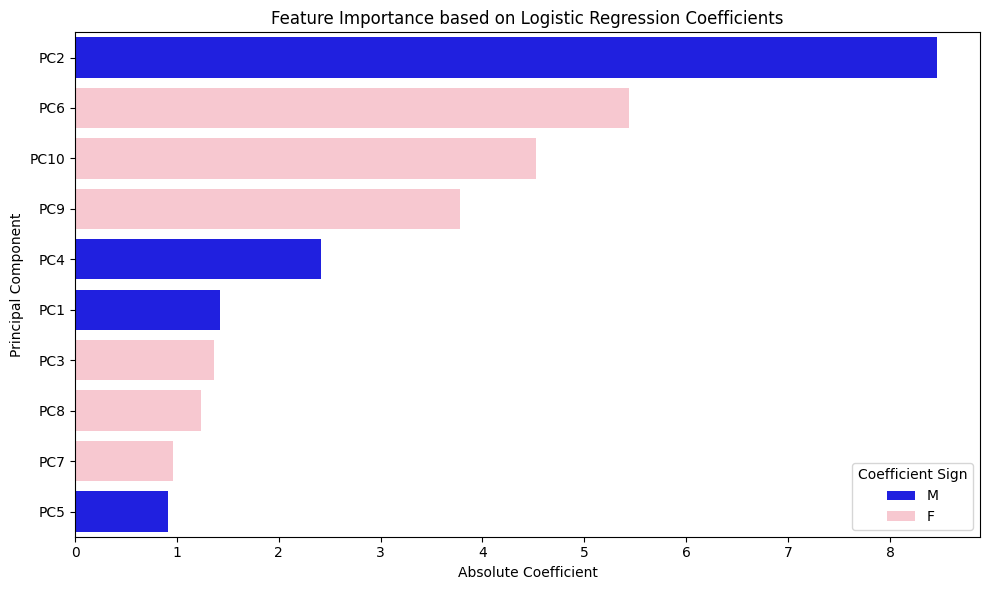

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column in the DataFrame to indicate if the coefficient is M or F
feature_importance_df['Coefficient_Sign'] = feature_importance_df['Coefficient'].apply(lambda x: 'M' if x < 0 else 'F')

# Plot the feature importance with proper hue for color differentiation
plt.figure(figsize=(10, 6))
sns.barplot(x='Abs_Coefficient', y='Feature', data=feature_importance_df, hue='Coefficient_Sign', dodge=False, palette={'F': 'pink', 'M': 'blue'})
plt.title('Feature Importance based on Logistic Regression Coefficients')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Principal Component')

plt.legend(title='Coefficient Sign')

# Show the plot
plt.tight_layout()
plt.show()


Principal components with their respective logistic regression coefficients and absolute values. The coefficients indicate the direction and strength of influence each component has on the model's output.

The bar plot visually represents the absolute coefficients, with blue bars indicating negative coefficients (associated with the male class, 'M'), and pink bars indicating positive coefficients (associated with the female class, 'F'):

1. PC2 is the most important feature for classifying males, as evidenced by blue bar.
2. PC6, PC9, and PC10 are the most important components for classifying females, indicated by pink bars.
3. Other components like PC10 and PC4 contribute to the classification but with lesser influence compared to PC2, PC6, and PC9.
